In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
class plot_error_surfaces(object):
    def __init__(self, w_range, b_range, X, Y, n_samples=30):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((n_samples, n_samples))
        self.x = X.numpy()
        self.y = Y.numpy()
        
        for i in range(n_samples):
            for j in range(n_samples):
                Z[i, j] = np.mean((self.y - (w[i,j] * self.x + b[i,j])) ** 2)
        
        self.Z = Z
        self.w = w
        self.b = b
        
        self.W = []    # history of w values
        self.B = []    # history of b values
        self.LOSS = [] # history of losses
        self.n = 0
        
        # Optional: show the surface at the beginning
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.w, self.b, self.Z, cmap='viridis', edgecolor='none')
        ax.set_title('Cost Surface (Loss)')
        ax.set_xlabel('w (slope)')
        ax.set_ylabel('b (bias)')
        ax.set_zlabel('Loss')
        plt.show()
        
        plt.figure(figsize=(8, 6))
        plt.contour(self.w, self.b, self.Z, levels=30)
        plt.title('Cost Surface Contour')
        plt.xlabel('w (slope)')
        plt.ylabel('b (bias)')
        plt.show()

    def set_para_loss(self, W, B, loss):
        self.n += 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)

    def plot_ps(self):
        plt.figure(figsize=(12, 5))
        
        # Left: Data and current line
        plt.subplot(1, 2, 1)
        plt.plot(self.x, self.y, 'ro', label='Training points')
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], 'b-', label='Current line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim(-10, 15)
        plt.legend()
        plt.title(f'Data Space – Iteration {self.n}')
        
        # Right: Contour with path
        plt.subplot(1, 2, 2)
        plt.contour(self.w, self.b, self.Z, levels=30)
        plt.scatter(self.W, self.B, c='red', marker='x', s=100, label='Path')
        plt.scatter(self.W[-1], self.B[-1], c='green', marker='o', s=150, label='Current')
        plt.xlabel('w (slope)')
        plt.ylabel('b (bias)')
        plt.legend()
        plt.title(f'Cost Contour – Iteration {self.n}')
        
        plt.tight_layout()
        plt.show()

    def final_plot(self):
        # 3D path on surface
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.w, self.b, self.Z, cmap='viridis', alpha=0.7, edgecolor='none')
        ax.plot(self.W, self.B, self.LOSS, 'r-', linewidth=3, label='Gradient Descent Path')
        ax.scatter(self.W, self.B, self.LOSS, c='red', marker='x', s=150)
        ax.set_xlabel('w')
        ax.set_ylabel('b')
        ax.set_zlabel('Loss')
        ax.set_title('Final 3D Path on Cost Surface')
        plt.legend()
        plt.show()
        
        # Contour path
        plt.figure(figsize=(8, 6))
        plt.contour(self.w, self.b, self.Z, levels=30)
        plt.plot(self.W, self.B, 'r-', linewidth=2)
        plt.scatter(self.W, self.B, c='red', marker='x', s=100)
        plt.xlabel('w')
        plt.ylabel('b')
        plt.title('Final Contour Path')
        plt.show()

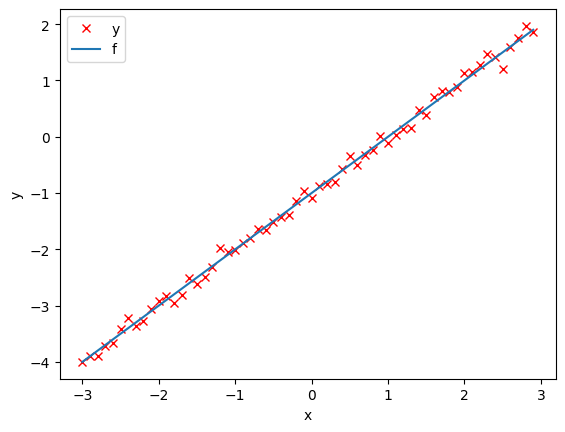

In [6]:
# True function f(x) with a slope of 1 and a bias of -1
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1
Y = f + 0.1 * torch.randn(X.size()) # noise 

# Plot out the line and the points with noise
plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

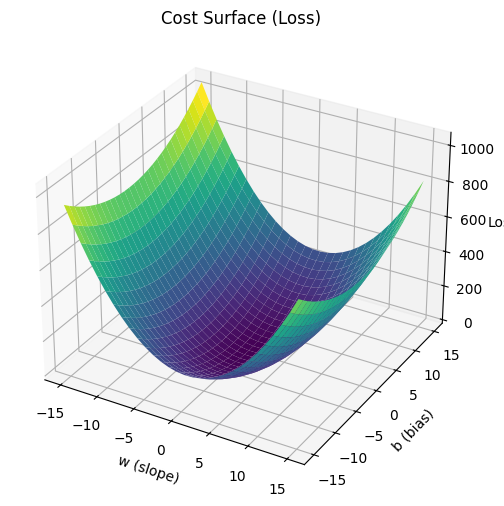

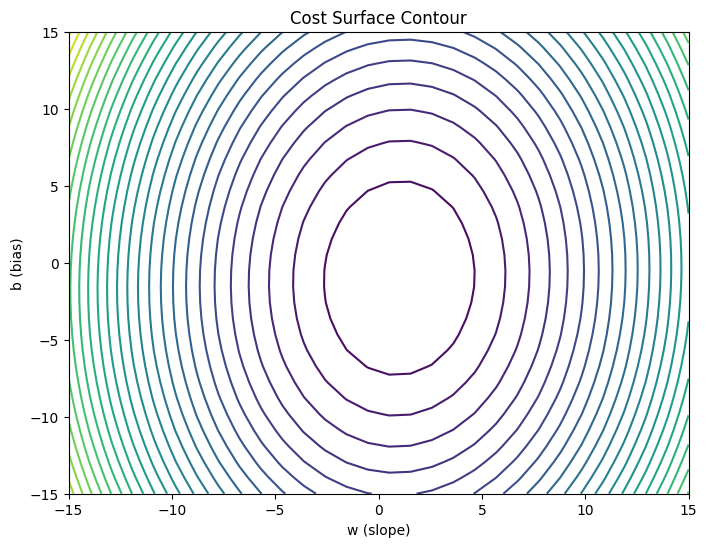

In [7]:
# Two parameters to learn
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

lr = 0.1
LOSS = []

# Create the visualizer
get_surface = plot_error_surfaces(15, 15, X, Y, 30)

def forward(x):
    return w * x + b

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

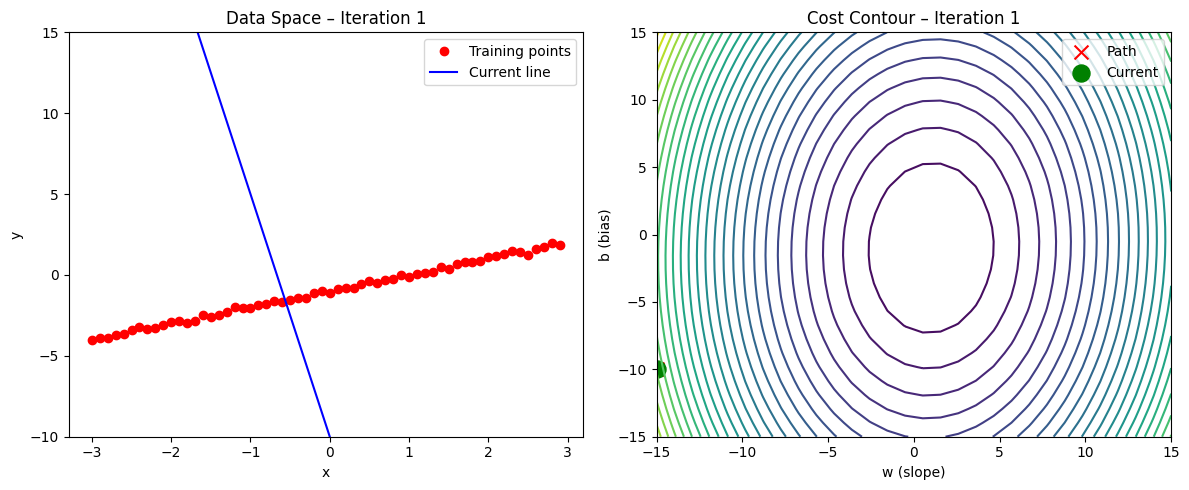

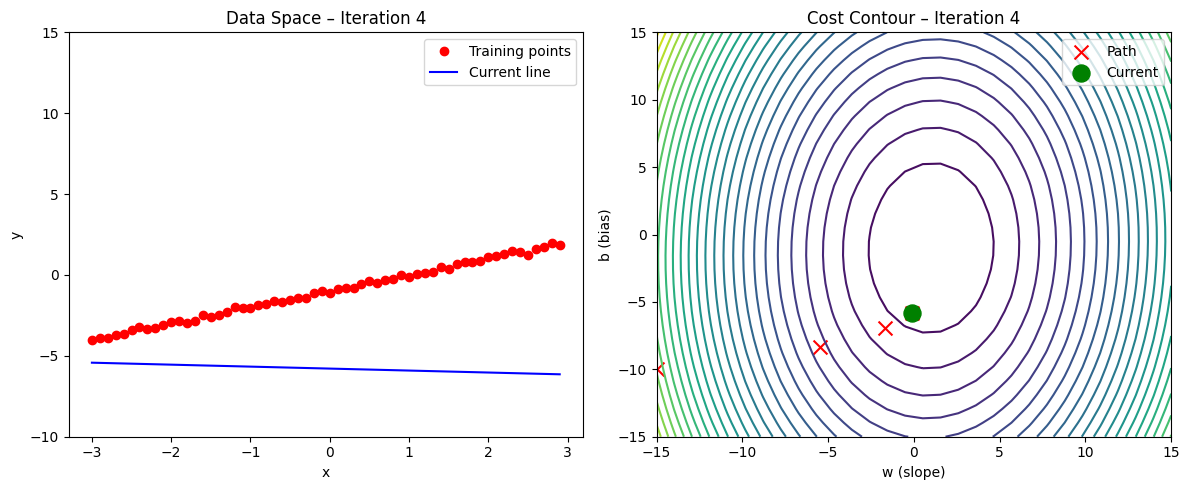

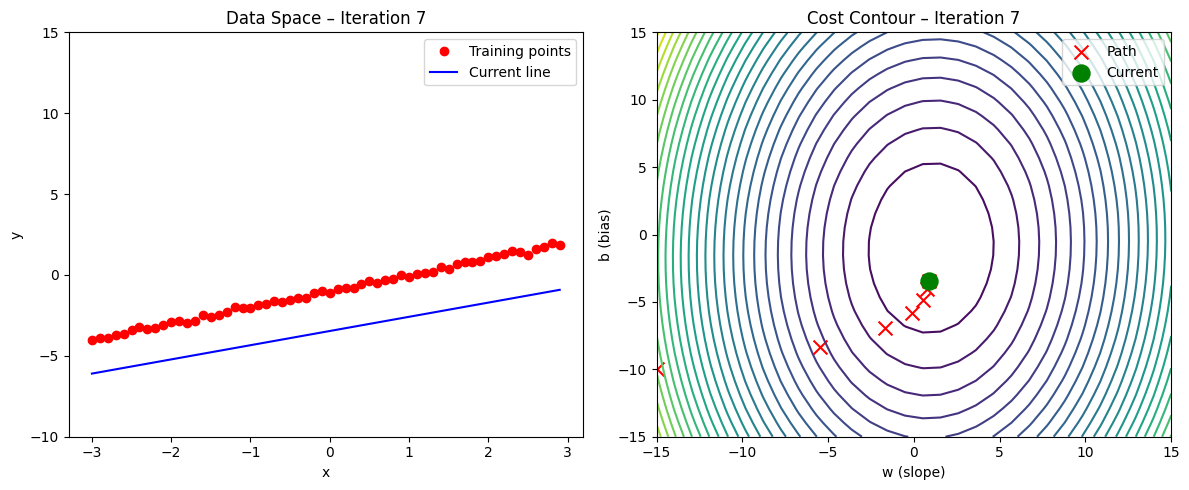

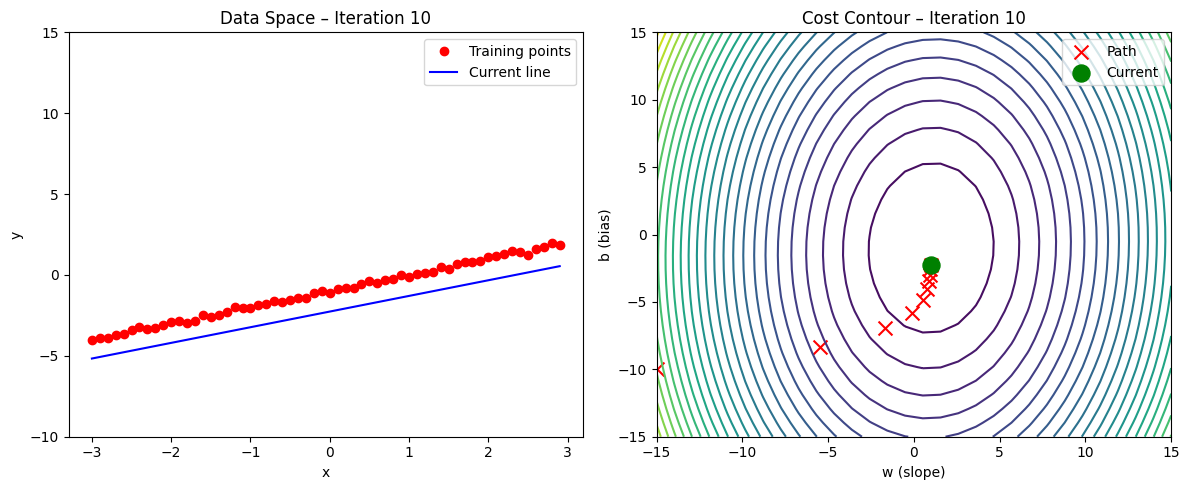

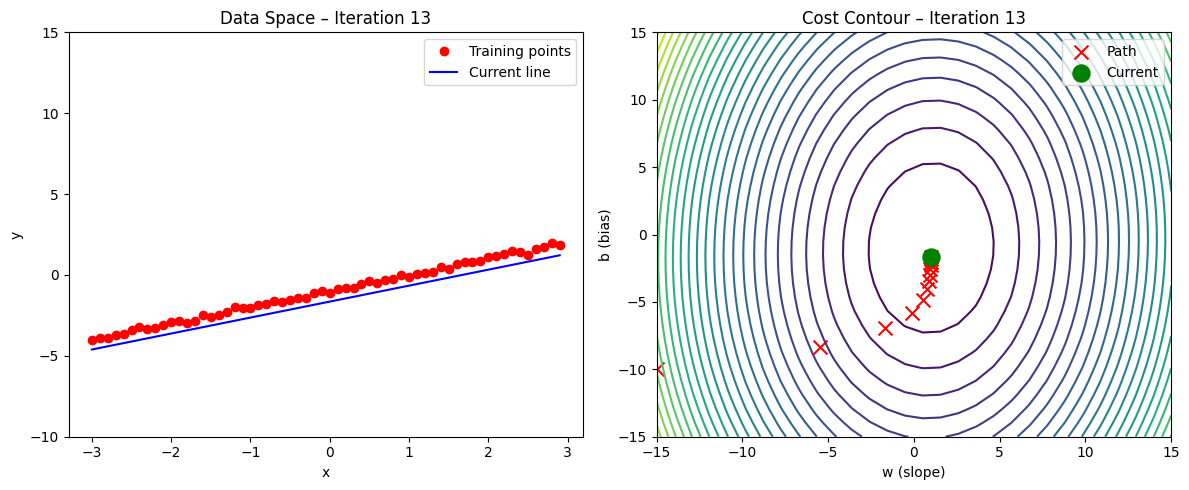

Learned w: 0.9951 (true = 1.0)
Learned b: -1.3301 (true = -1.0)
Final loss: 0.1813


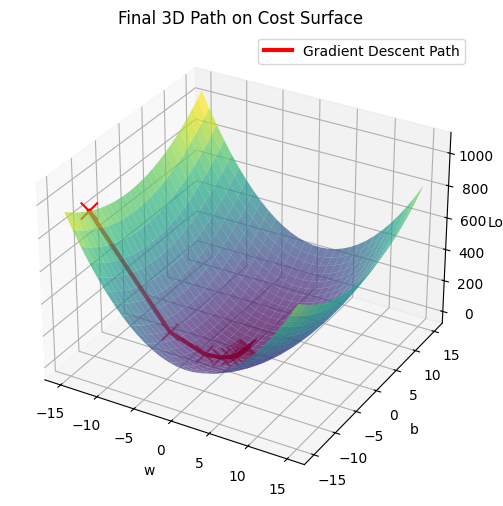

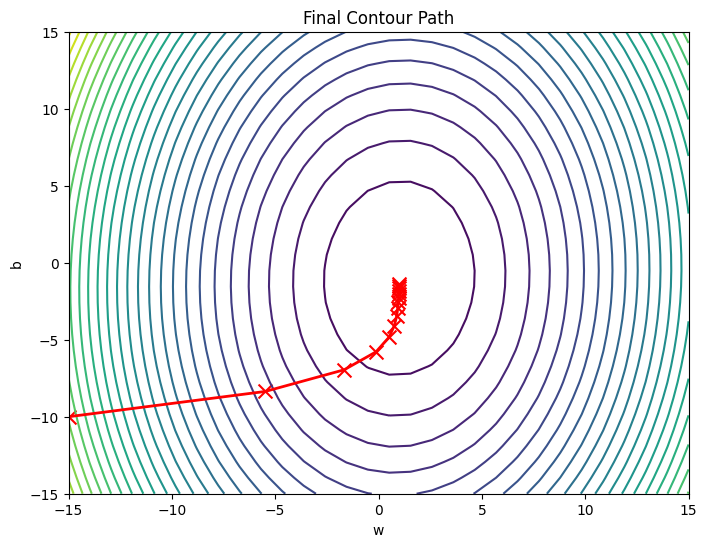

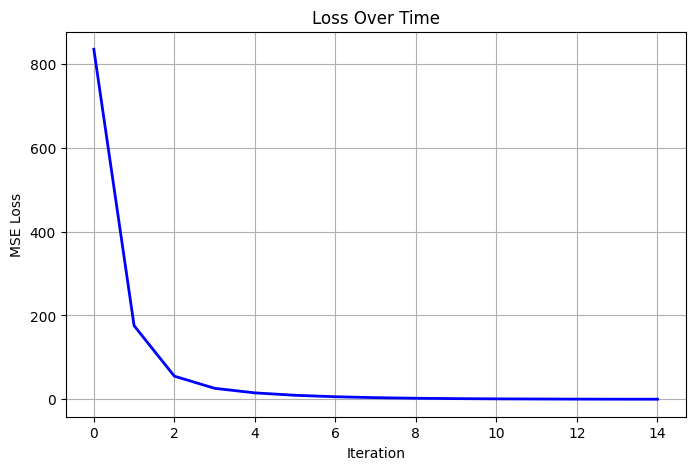

In [8]:
def train_model(iterations):
    for epoch in range(iterations):
        # Forward pass
        Yhat = forward(X)
        
        # Loss
        loss = criterion(Yhat, Y)
        
        # Record for plotting
        get_surface.set_para_loss(w.item(), b.item(), loss.item())
        
        # Plot every 3 steps
        if epoch % 3 == 0:
            get_surface.plot_ps()
        
        # Store loss
        LOSS.append(loss.item())
        
        # Backward pass
        loss.backward()
        
        # Update parameters (manual gradient descent)
        w.data -= lr * w.grad.data
        b.data -= lr * b.grad.data
        
        # Zero gradients
        w.grad.data.zero_()
        b.grad.data.zero_()

# Run training
train_model(15)

# Final results
print(f"Learned w: {w.item():.4f} (true = 1.0)")
print(f"Learned b: {b.item():.4f} (true = -1.0)")
print(f"Final loss: {LOSS[-1]:.4f}")

# Show final plots
get_surface.final_plot()

# Loss curve
plt.figure(figsize=(8, 5))
plt.plot(LOSS, 'b-', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Over Time")
plt.grid(True)
plt.show()

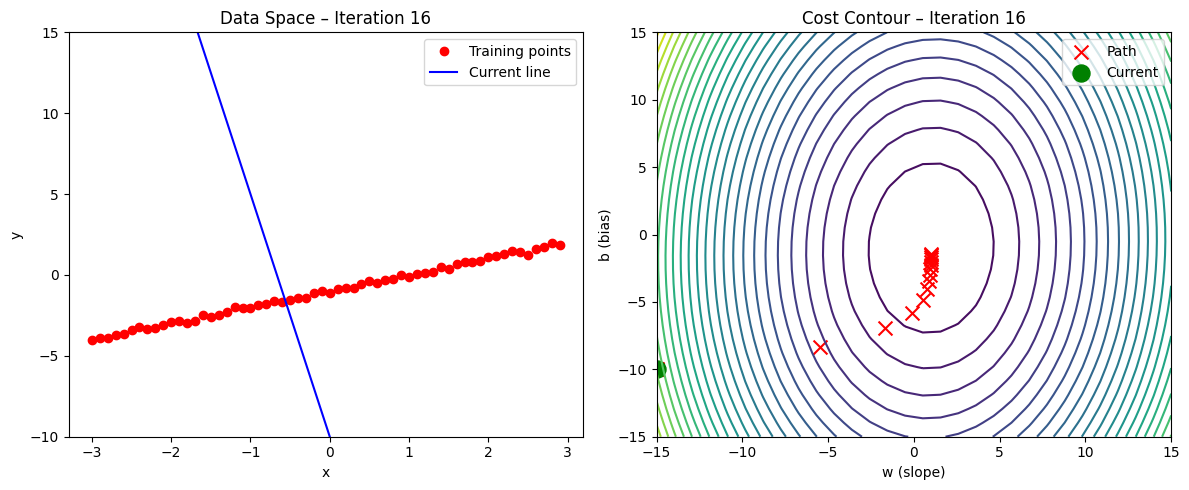

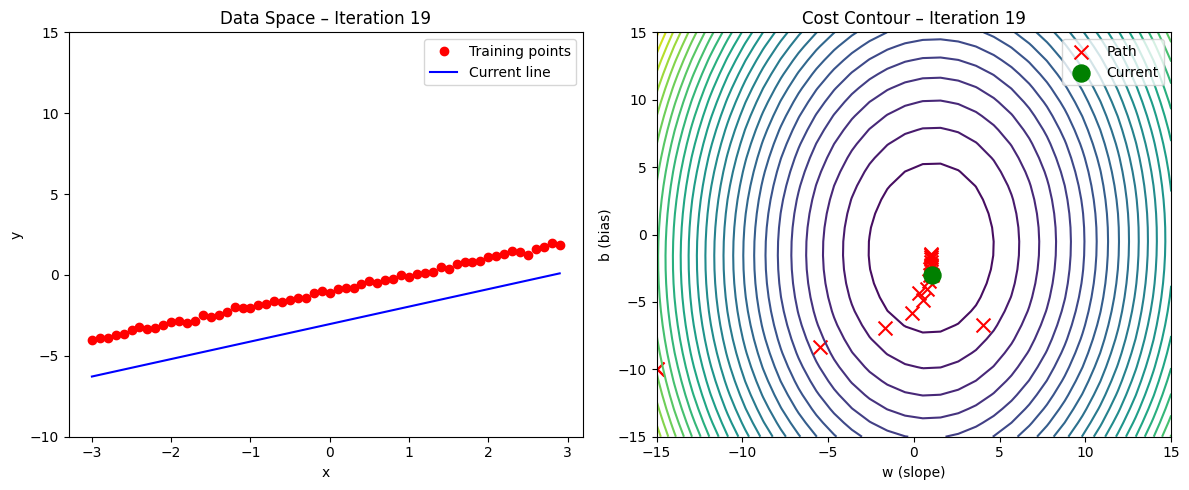

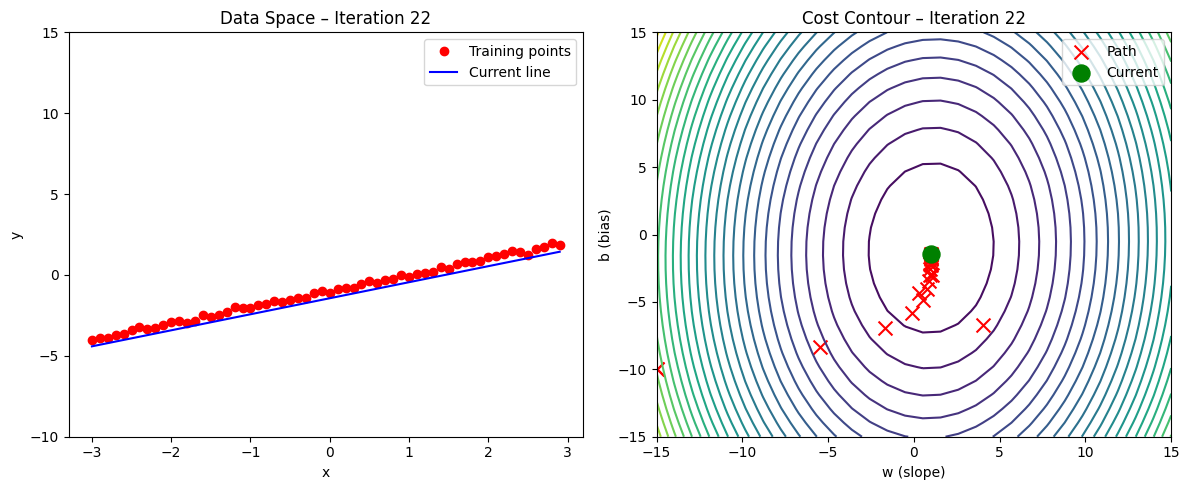

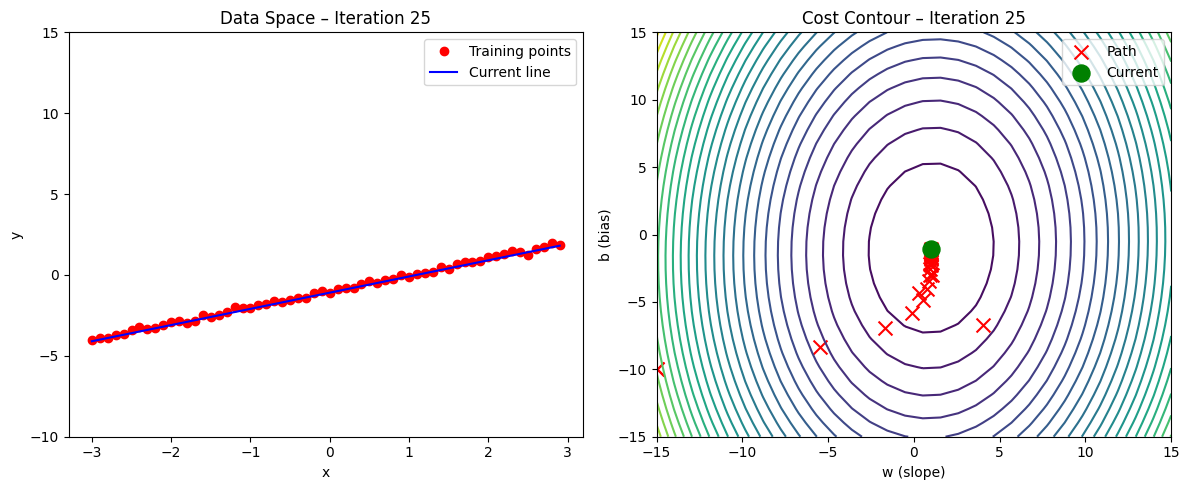

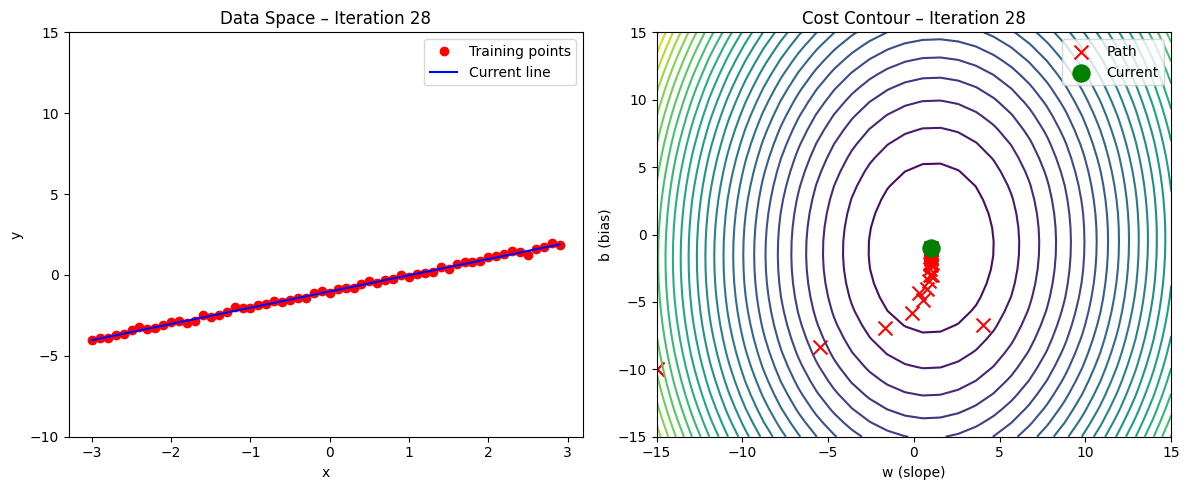

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

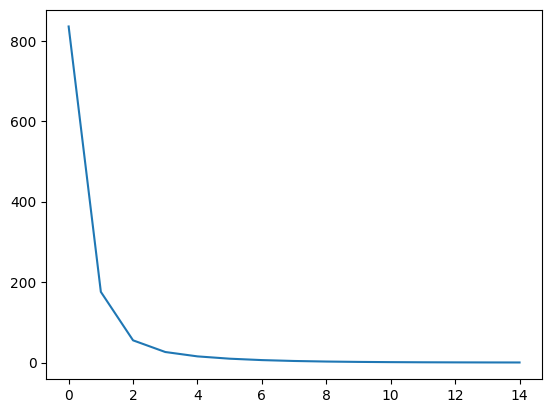

In [9]:
"using s learning rates 0.2 and width the following parameters. Run 15 iterations."
w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []

def my_train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
my_train_model(15)

plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()